In [609]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [645]:
titanic_db = acquire.get_titanic_data()
#titanic_db['new_parch'] = abs(titanic_db['parch'] - 5)
titanic_db

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [646]:
titanic_db = titanic_db.drop(columns=['age', 'embarked', 'fare', 'class', 'deck'])#, 'parch'])

In [647]:
dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True, True])
#dummy_titanic_db['embark_town_Queenstown_switched'] =  
dummy_titanic_db

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [648]:
titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
titanic_db

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,Southampton,0,1,0,1
1,1,1,1,1,female,1,0,Cherbourg,0,0,0,0
2,2,2,1,3,female,0,0,Southampton,1,0,0,1
3,3,3,1,1,female,1,0,Southampton,0,0,0,1
4,4,4,0,3,male,0,0,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,0,0,Southampton,1,1,0,1
887,887,887,1,1,female,0,0,Southampton,1,0,0,1
888,888,888,0,3,female,1,2,Southampton,0,0,0,1
889,889,889,1,1,male,0,0,Cherbourg,1,1,0,0


In [649]:
titanic_db = titanic_db.drop(['Unnamed: 0', 'passenger_id', 'sex', 'embark_town'], axis=1)


In [650]:
def split_data(df, stratify_col):
    train_validate, test = train_test_split(df, test_size = .2, random_state=123, stratify=df[stratify_col])
    train, validate = train_test_split(train_validate, test_size=.25, random_state=123, stratify=train_validate[stratify_col])
    return train, validate, test

In [651]:
titanic_train, titanic_validate, titanic_test = split_data(titanic_db, stratify_col = 'survived')
#truncated_titanic = titanic_train[numeric]

In [652]:
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((534, 8), (178, 8), (179, 8))

In [653]:
titanic_train, titanic_validate, titanic_test = split_data(titanic_db, stratify_col = 'survived')
#truncated_titanic = titanic_train[numeric]
#titanic_train = titanic_train.drop(['Unnamed: 0', 'passenger_id', 'sex', 'embark_town'], axis=1)
titanic_train

,survived,pclass,sibsp,parch,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,1,1,0,0
380,1,1,0,0,1,0,0,0
492,0,1,0,0,1,1,0,1
55,1,1,0,0,1,1,0,1
243,0,3,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
695,0,2,0,0,1,1,0,1
128,1,3,1,1,0,0,0,0
636,0,3,0,0,1,1,0,1
222,0,3,0,0,1,1,0,1


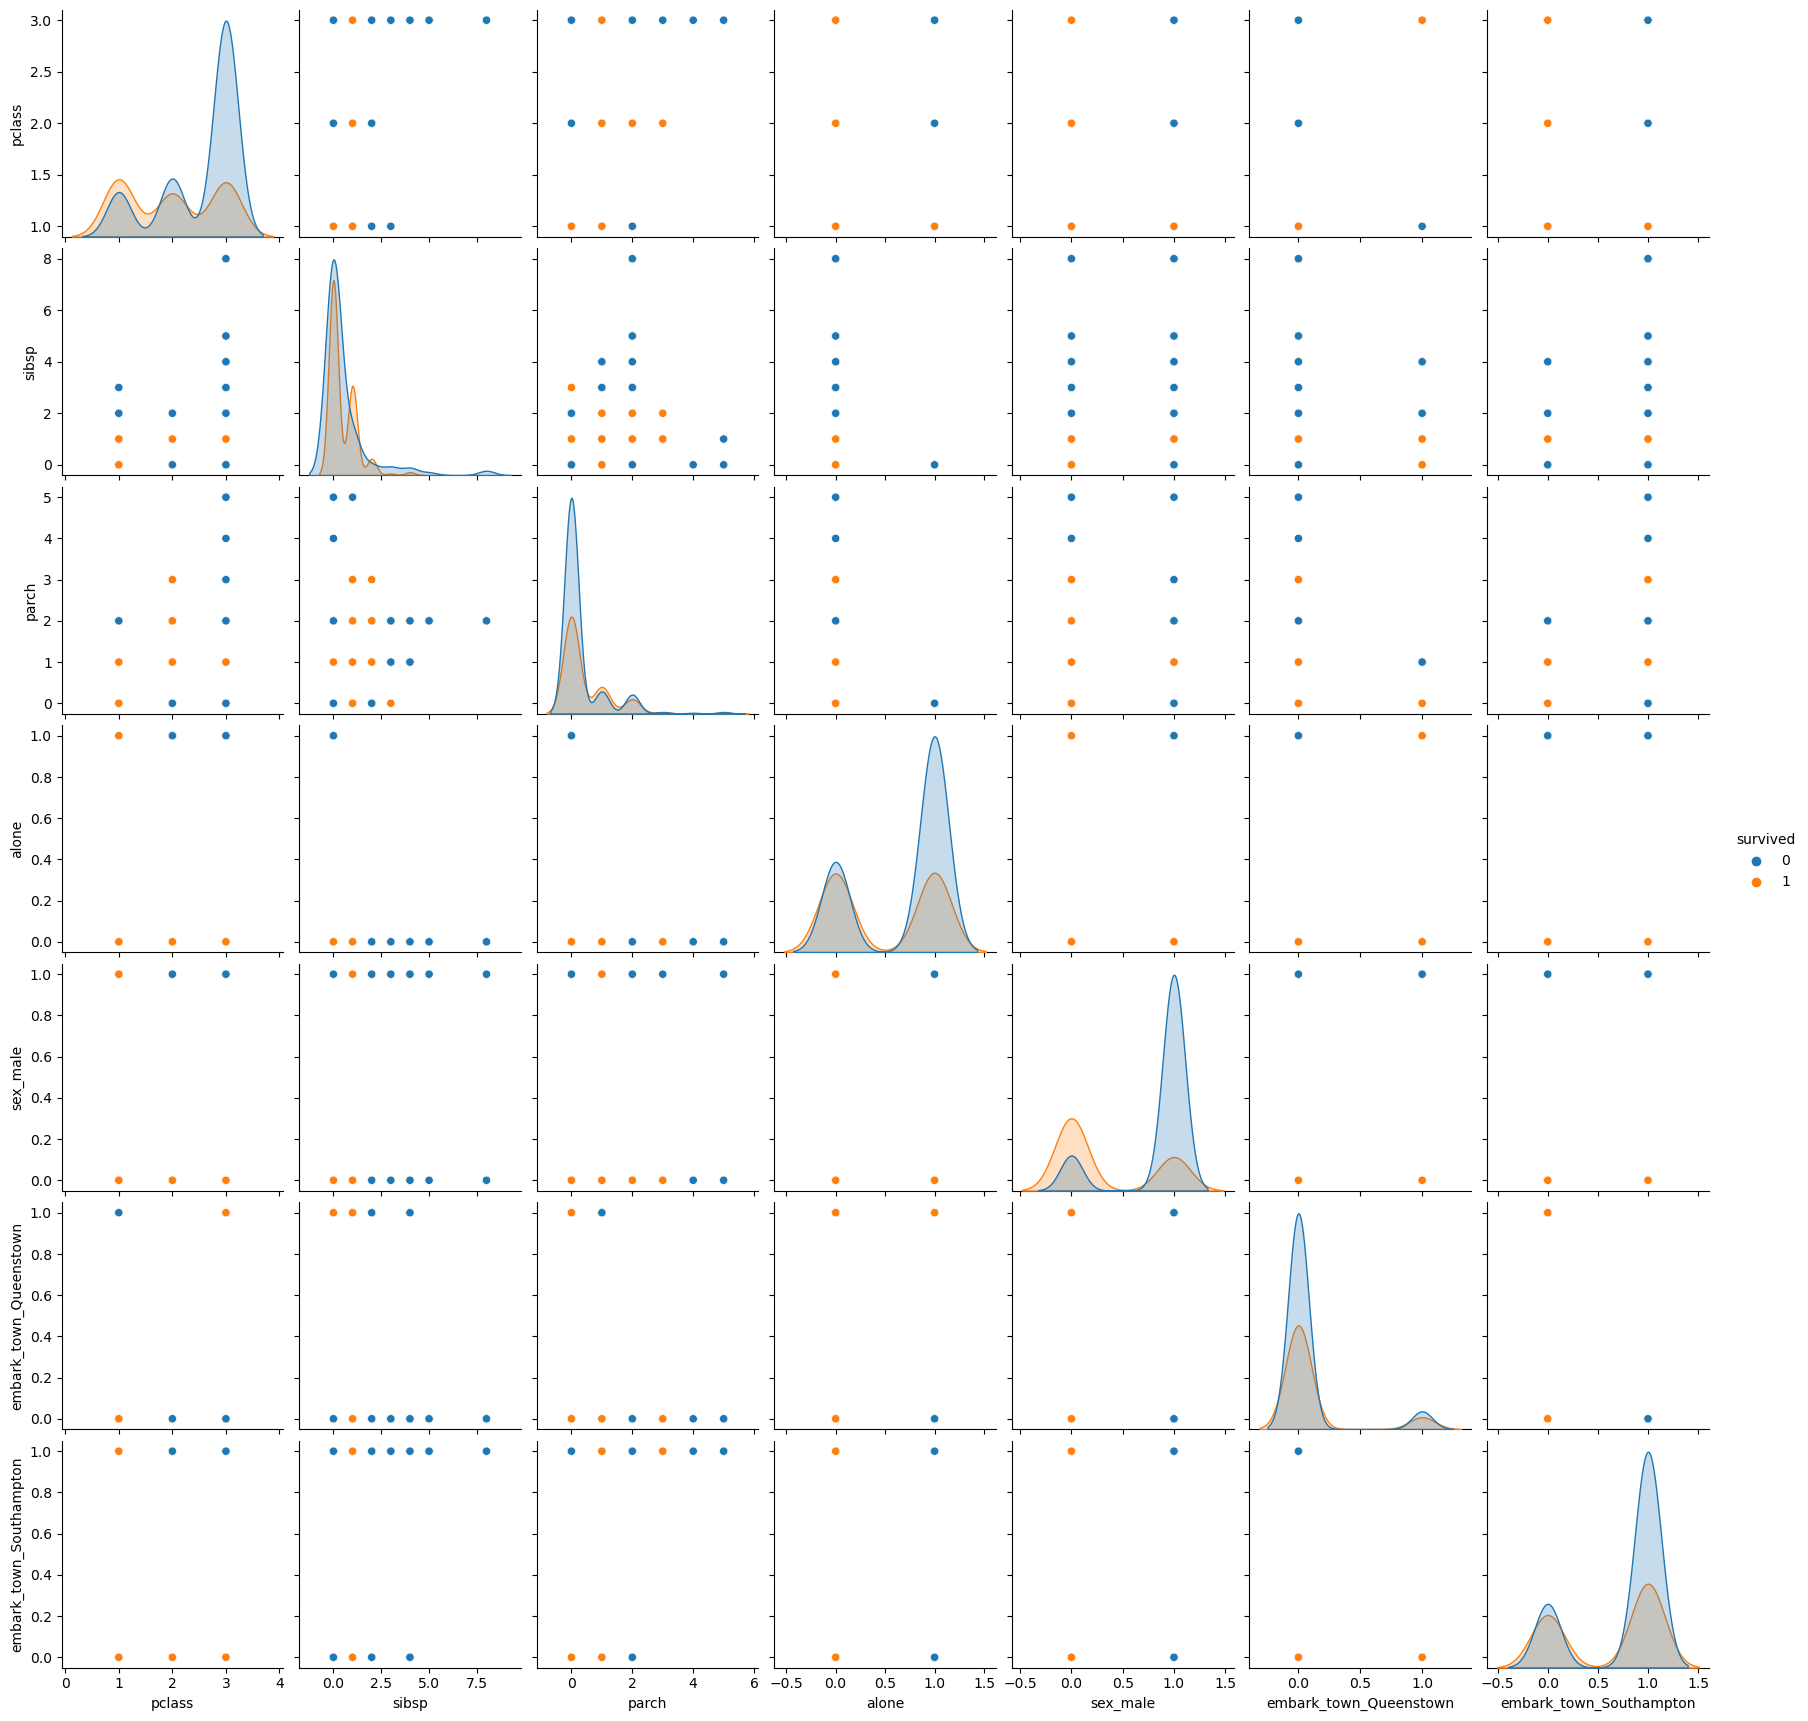

In [654]:
sns.pairplot(titanic_train, hue='survived')

In [655]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [656]:
X_train = titanic_train[titanic_train.columns[1:]]
y_train = titanic_train.survived

X_validate = titanic_validate[titanic_validate.columns[1:]]
y_validate = titanic_validate.survived

X_test = titanic_test[titanic_test.columns[1:]]
y_test = titanic_test.survived

In [657]:
def mydistance (x,y):
    z=(x+y)
    return (1/log(z(2))) 

In [658]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)

In [659]:
knn5.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [660]:
y_pred5 = knn5.predict(X_train)

In [661]:
y_pred5

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [662]:
y_pred_proba = knn5.predict_proba(X_train)

In [663]:
y_pred_proba

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

In [664]:
knn5.classes_

array([0, 1])

In [665]:
from sklearn.metrics import ConfusionMatrixDisplay

In [666]:
confusion_matrix(y_train, y_pred5)

array([[313,  16],
       [ 61, 144]])

In [667]:
pd.crosstab(y_train, y_pred5)

col_0,0,1
survived,,
0,313,16
1,61,144


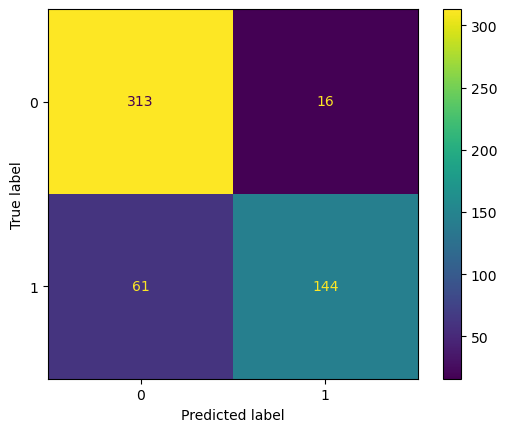

In [668]:
ConfusionMatrixDisplay.from_estimator(knn5, X_train, y_train)

In [669]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       329
           1       0.90      0.70      0.79       205

    accuracy                           0.86       534
   macro avg       0.87      0.83      0.84       534
weighted avg       0.86      0.86      0.85       534



In [681]:
model_set = []
model_accuracies = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=1)
    knn.fit(X_train, y_train)
    
    model_set.append(knn)
    model_accuracies[f'{i} neighbors'] = {
        'train_score' : round(knn.score(X_train, y_train), 5),
        'validate_score' : round(knn.score(X_validate, y_validate), 5)
    }

In [684]:
model_set

[KNeighborsClassifier(n_neighbors=1, p=1),
 KNeighborsClassifier(n_neighbors=2, p=1),
 KNeighborsClassifier(n_neighbors=3, p=1),
 KNeighborsClassifier(n_neighbors=4, p=1),
 KNeighborsClassifier(p=1),
 KNeighborsClassifier(n_neighbors=6, p=1),
 KNeighborsClassifier(n_neighbors=7, p=1),
 KNeighborsClassifier(n_neighbors=8, p=1),
 KNeighborsClassifier(n_neighbors=9, p=1),
 KNeighborsClassifier(n_neighbors=10, p=1),
 KNeighborsClassifier(n_neighbors=11, p=1),
 KNeighborsClassifier(n_neighbors=12, p=1),
 KNeighborsClassifier(n_neighbors=13, p=1),
 KNeighborsClassifier(n_neighbors=14, p=1),
 KNeighborsClassifier(n_neighbors=15, p=1),
 KNeighborsClassifier(n_neighbors=16, p=1),
 KNeighborsClassifier(n_neighbors=17, p=1),
 KNeighborsClassifier(n_neighbors=18, p=1),
 KNeighborsClassifier(n_neighbors=19, p=1)]

In [685]:
model_accuracies

{'1 neighbors': {'train_score': 0.8015, 'validate_score': 0.69663},
 '2 neighbors': {'train_score': 0.82959, 'validate_score': 0.77528},
 '3 neighbors': {'train_score': 0.83146, 'validate_score': 0.76966},
 '4 neighbors': {'train_score': 0.8221, 'validate_score': 0.76404},
 '5 neighbors': {'train_score': 0.82584, 'validate_score': 0.75843},
 '6 neighbors': {'train_score': 0.82772, 'validate_score': 0.77528},
 '7 neighbors': {'train_score': 0.82397, 'validate_score': 0.7809},
 '8 neighbors': {'train_score': 0.82397, 'validate_score': 0.76966},
 '9 neighbors': {'train_score': 0.81273, 'validate_score': 0.73034},
 '10 neighbors': {'train_score': 0.8221, 'validate_score': 0.76966},
 '11 neighbors': {'train_score': 0.82022, 'validate_score': 0.77528},
 '12 neighbors': {'train_score': 0.8221, 'validate_score': 0.79213},
 '13 neighbors': {'train_score': 0.81835, 'validate_score': 0.78652},
 '14 neighbors': {'train_score': 0.81461, 'validate_score': 0.79213},
 '15 neighbors': {'train_score': 0

In [676]:
pd.DataFrame(model_accuracies).T

,train_score,validate_score
1 neighbors,0.80,0.70
2 neighbors,0.83,0.78
3 neighbors,0.83,0.77
4 neighbors,0.82,0.76
5 neighbors,0.83,0.76
6 neighbors,0.83,0.78
7 neighbors,0.82,0.78
8 neighbors,0.82,0.77
9 neighbors,0.81,0.73
10 neighbors,0.82,0.77


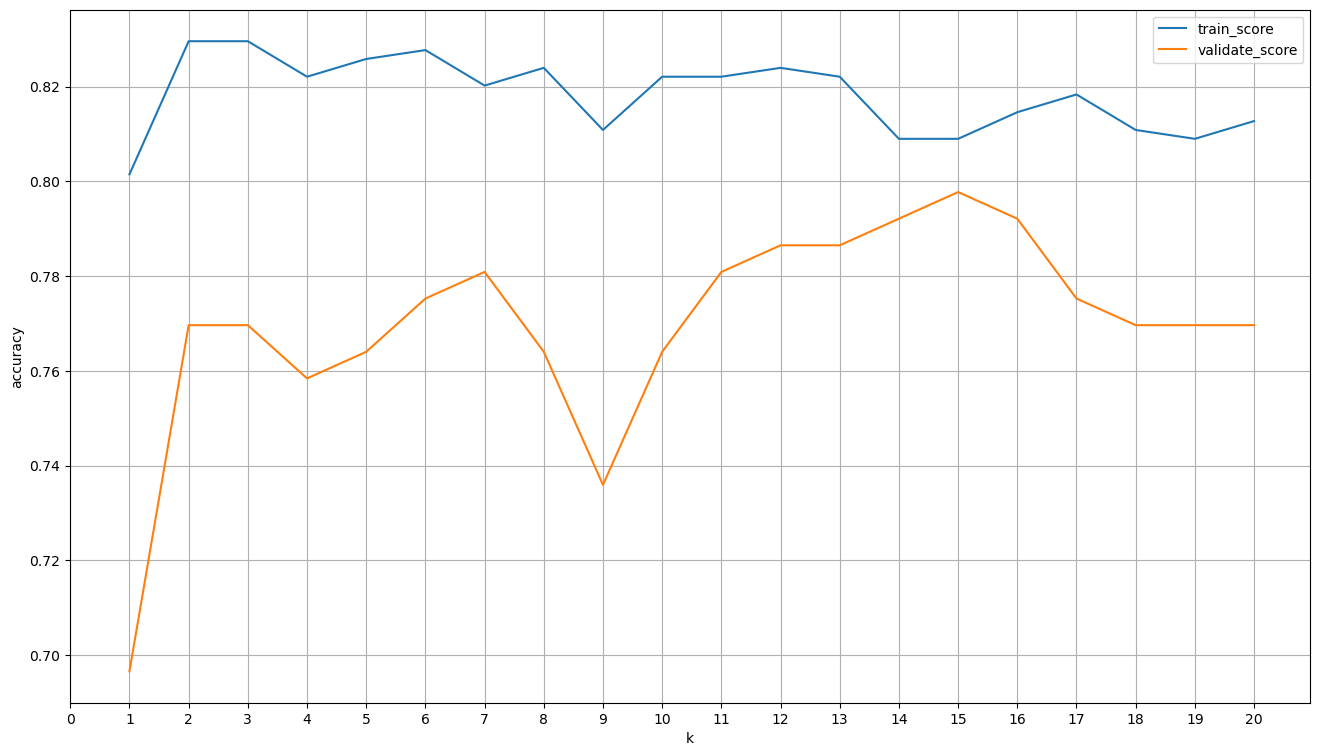

In [677]:
metrics = []

# loop through different values of k
for k in range(1,21):
    #MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    #FIT the thing
    knn.fit(X_train, y_train)
    #USE the thing
    train_score= knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score}
    
    metrics.append(output)
    
results = pd.DataFrame(metrics)

#PLOT the data
results.set_index('k').plot(figsize=(16,9))
plt.ylabel('accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()